In [1]:
#importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as py

In [2]:
#Defining file path
file_to_load = 'Resources/clean_data1.csv'
data = pd.read_csv(file_to_load)

In [3]:
# Setting Data Frame columns
df = pd.DataFrame(data, columns = ["Involvement","Sex","Age"])
df

,Involvement,Sex,Age
0,VIC,U,0
1,VIC,U,0
2,VIC,F,0
3,VIC,M,66
4,SUS,M,0
...,...,...,...
128933,VIC,M,0
128934,SUS,M,0
128935,VIC,M,72
128936,VIC,F,33


In [4]:
# Investigating columns
df.columns

Index(['Involvement', 'Sex', 'Age'], dtype='object')

In [5]:
# Investigating types
df.dtypes

Involvement    object
Sex            object
Age             int64
dtype: object

In [6]:
# Investigating counts
df['Involvement'].value_counts()

VIC    67552
SUS    49279
ARR    12107
Name: Involvement, dtype: int64

In [7]:
# Investigating counts
df['Sex'].value_counts()

M    51254
U    42380
F    35304
Name: Sex, dtype: int64

In [8]:
# Investigating counts
df["Age"].value_counts()

0      59023
25      2696
30      2648
20      2397
28      2394
       ...  
303        1
114        1
242        1
120        1
501        1
Name: Age, Length: 99, dtype: int64

In [9]:
# Setting columns for 1st Question Dataframe
typesofInvolvement = pd.DataFrame(df, columns = ["Sex",'Involvement',"Age"])
typesofInvolvement

,Sex,Involvement,Age
0,U,VIC,0
1,U,VIC,0
2,F,VIC,0
3,M,VIC,66
4,M,SUS,0
...,...,...,...
128933,M,VIC,0
128934,M,SUS,0
128935,M,VIC,72
128936,F,VIC,33


In [10]:
# Formatting 1st Question DataFrame
typesofInvolvement_df = df.groupby(['Sex','Involvement'])["Age"].count()
print(typesofInvolvement_df)

Sex  Involvement
F    ARR             3491
     SUS             6985
     VIC            24828
M    ARR             8616
     SUS            19275
     VIC            23363
U    SUS            23019
     VIC            19361
Name: Age, dtype: int64


In [11]:
#Reseting Index for 1st DataFrame
typesofInvolvement_df = typesofInvolvement_df.reset_index()


In [12]:
# Renaminging column on 1st DataFrame
typesofInvolvement_df.rename(columns={'Age':'Count'}, inplace=True)
typesofInvolvement_df

,Sex,Involvement,Count
0,F,ARR,3491
1,F,SUS,6985
2,F,VIC,24828
3,M,ARR,8616
4,M,SUS,19275
5,M,VIC,23363
6,U,SUS,23019
7,U,VIC,19361


In [64]:
#Pivoting Data for 1st Question of DataFrame
Genders = typesofInvolvement_df.pivot(index='Sex', columns='Involvement', values = 'Count')
Genders

Involvement,ARR,SUS,VIC
Sex,,,
F,3491.0,6985.0,24828.0
M,8616.0,19275.0,23363.0
U,NaN,23019.0,19361.0


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

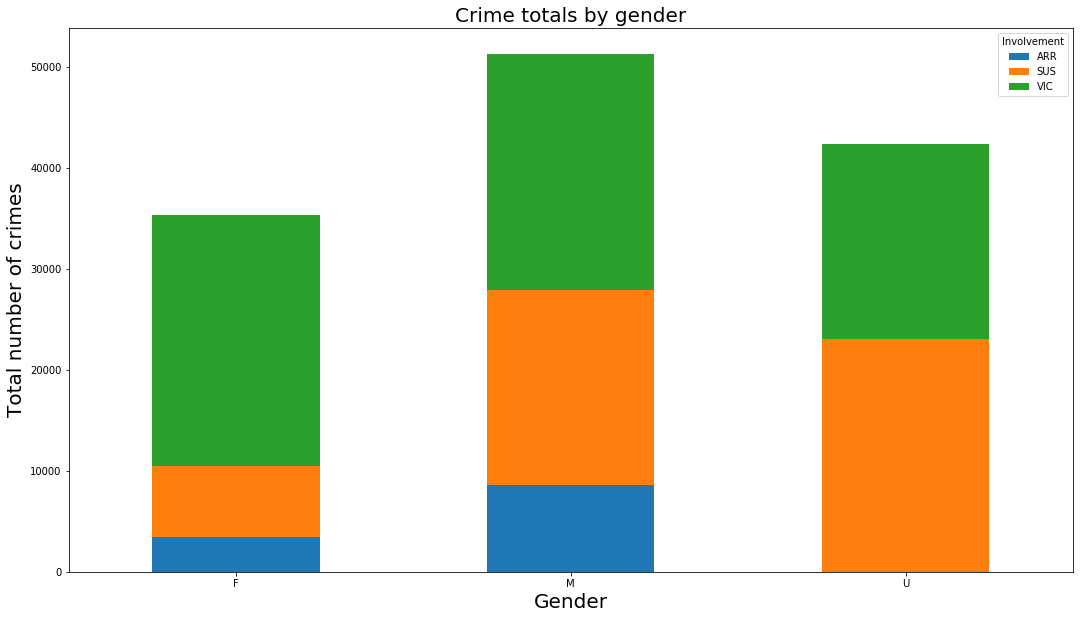

In [91]:
Genders.plot(kind="bar",stacked=True,figsize=(18,10));
plt.title('Crime totals by gender',fontsize=20)
plt.xlabel("Gender",fontsize=20,rotation=0)
plt.ylabel("Total number of crimes",fontsize=20);
plt.xticks(rotation=0)

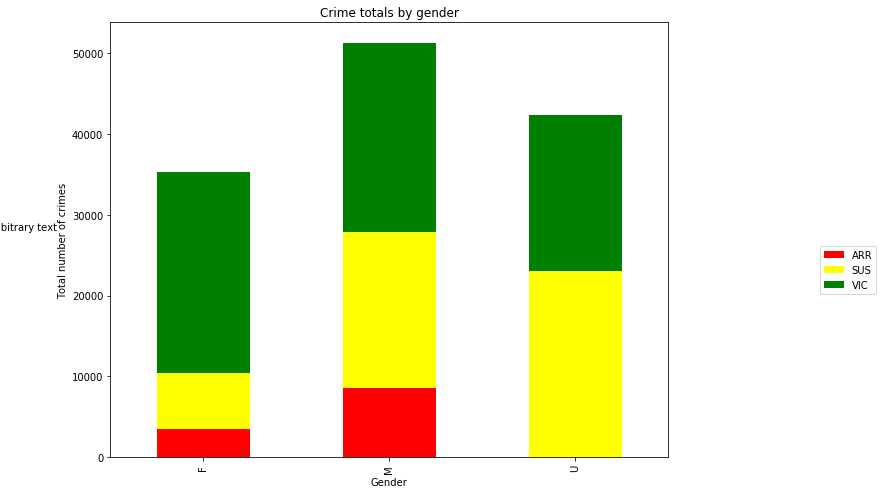

In [70]:
# Creating 1st Matplotlib visualization and saving figure
colors = ['red','yellow','green']
pGenders = Genders.loc[:,].plot.bar(stacked=True, figsize=(10,8), color = colors)
plt.legend(bbox_to_anchor=(1.15,0.5), loc="upper center", fontsize=10,
                bbox_transform=plt.gcf().transFigure)
text = pGenders.text(-0.2,1.05, "Aribitrary text", transform=ax.transAxes)
pGenders.set_title('Crime totals by gender')
pGenders.set_xlabel("Gender")
pGenders.set_ylabel("Total number of crimes")
plt.savefig("Resources/JohnFig1.png")
plt.show()


In [16]:
#Investigating len of bins
#len(bins)

In [17]:
#Investigating len of group labels
len(Group_Labels)

NameError: name 'Group_Labels' is not defined

In [18]:
#Displaying Dataframe head
df.head()

,Involvement,Sex,Age
0,VIC,U,0
1,VIC,U,0
2,VIC,F,0
3,VIC,M,66
4,SUS,M,0


In [19]:
#Copy to investigate 
copy_df.head()

NameError: name 'copy_df' is not defined

In [20]:
import numpy as np

In [21]:
#Creating Bins and Group Labels
bins = [0,15,25,35,45,55,65,75,85,99] 

Group_Labels = ["1","15-25","25-35","35-45","45-55","55-65","65-75","75-85","85+"]

In [22]:
#Creating 2nd DataFrame for second question
copy_df = df
copy_df = pd.DataFrame(copy_df, columns = ["Sex","Involvement","Age"])
copy_df['Age Ranges']= pd.cut(df["Age"],bins,labels = Group_Labels)


copy_df['Age Ranges'] = copy_df['Age Ranges'].astype('str')

copy_df['Age Ranges'].unique()

copy_df.replace({'nan':'Unknown'})

,Sex,Involvement,Age,Age Ranges
0,U,VIC,0,Unknown
1,U,VIC,0,Unknown
2,F,VIC,0,Unknown
3,M,VIC,66,65-75
4,M,SUS,0,Unknown
...,...,...,...,...
128933,M,VIC,0,Unknown
128934,M,SUS,0,Unknown
128935,M,VIC,72,65-75
128936,F,VIC,33,25-35


In [23]:
#Setting columns for 2nd Question Datamframe
age_gender = pd.DataFrame(copy_df, columns = ["Sex","Age","Age Ranges"])
age_gender.replace({'nan':'Unknown'})

,Sex,Age,Age Ranges
0,U,0,Unknown
1,U,0,Unknown
2,F,0,Unknown
3,M,66,65-75
4,M,0,Unknown
...,...,...,...
128933,M,0,Unknown
128934,M,0,Unknown
128935,M,72,65-75
128936,F,33,25-35


In [24]:
#Investigating data from 2nd DataFrame
age_gender_df = copy_df.groupby(["Sex","Age Ranges"])["Age"].count()
print(age_gender_df)

Sex  Age Ranges
F    15-25          7123
     25-35          9307
     35-45          5994
     45-55          4014
     55-65          2287
     65-75           848
     75-85           346
     85+              93
     nan            5292
M    15-25          8768
     25-35         11749
     35-45          7920
     45-55          5831
     55-65          3936
     65-75          1189
     75-85           336
     85+              76
     nan           11449
U    15-25            23
     25-35            25
     35-45            10
     45-55             4
     55-65             5
     65-75             3
     nan           42310
Name: Age, dtype: int64


In [25]:
#Restting 2nd DataFrame 
age_gender_df = age_gender_df.reset_index()

In [26]:
#Renaming column on 2nd DataFrame
age_gender_df.rename(columns={"Age":"Count"}, inplace=True)
age_gender_df                  

,Sex,Age Ranges,Count
0,F,15-25,7123
1,F,25-35,9307
2,F,35-45,5994
3,F,45-55,4014
4,F,55-65,2287
5,F,65-75,848
6,F,75-85,346
7,F,85+,93
8,F,nan,5292
9,M,15-25,8768


In [27]:
#Pivoting 2nd DataFrame
Ages = age_gender_df.pivot(index="Sex", columns="Age Ranges", values = "Count")
Ages

Age Ranges,15-25,25-35,35-45,45-55,55-65,65-75,75-85,85+,nan
Sex,,,,,,,,,
F,7123.0,9307.0,5994.0,4014.0,2287.0,848.0,346.0,93.0,5292.0
M,8768.0,11749.0,7920.0,5831.0,3936.0,1189.0,336.0,76.0,11449.0
U,23.0,25.0,10.0,4.0,5.0,3.0,NaN,NaN,42310.0


In [28]:
# #Deleting out the Nan column
# del Ages['nan']
# Ages

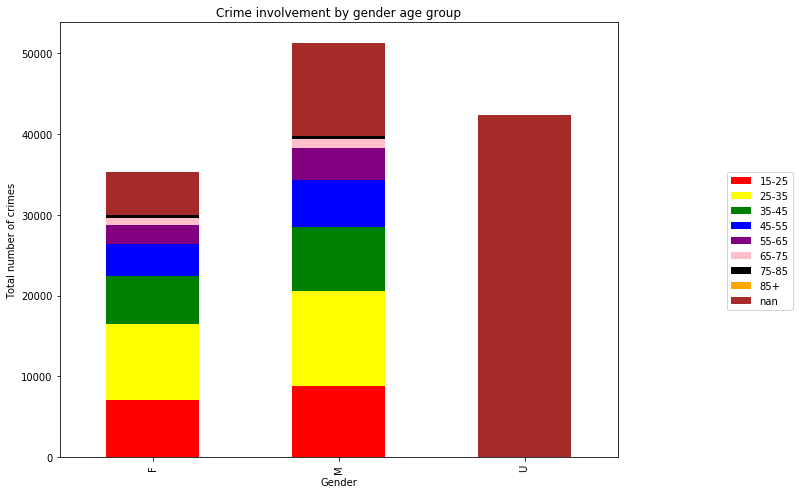

In [29]:
#Creating 2nd Matplotlib visualization and saving figure
colors = ['red','yellow','green','blue','purple','pink','black',"orange","brown"]
pAges = Ages.loc[:,].plot.bar(stacked=True, figsize=(10,8), color = colors)
pAges.legend(bbox_to_anchor=(1.15,0.5), loc="center right", fontsize=10,
                bbox_transform=plt.gcf().transFigure)
pAges.set_title('Crime involvement by gender age group')
pAges.set_xlabel("Gender")
pAges.set_ylabel("Total number of crimes")
plt.savefig("Resources/JohnFig2.png")
plt.show()